<a href="https://colab.research.google.com/github/lebedevAU/N1/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%97_Pro_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 
Анализ данных

# Pro

Возьмите базу квартир (moscow.csv). Проведите парсинг и очистку данных. Проанализируйте зависимость стоимости квартир от различных параметров (количество комнат, станции метро и т. д.). Постройте графики.


In [ ]:
%matplotlib inline

import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
from tensorflow.keras import utils # Будем использовать эту библиотеку для 
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой

import re # Регулряные выражения для эффективной работы со строками

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dbase = pd.read_csv("/content/drive/My Drive/moscow.csv", sep=";") 
dbase.info
dbase.head(5)

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции,Источник,Примечание
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0,Привлекательные,Собственность оформлена! Ключи на руках! Опера...
1,Для заметок:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0,Привлекательные,Зеленоград к.1820 однокомнатная квартира общ.3...
3,Для заметок:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0,Привлекательные,"Уютная, светлая квартира, застекленный балкон ..."


In [ ]:
dbase.head(5)

,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции,Источник,Примечание
Комнат,,,,,,,,,,,,,
1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0,Привлекательные,Собственность оформлена! Ключи на руках! Опера...
Для заметок:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0,Привлекательные,Зеленоград к.1820 однокомнатная квартира общ.3...
Для заметок:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0,Привлекательные,"Уютная, светлая квартира, застекленный балкон ..."


In [ ]:
dbase= dbase[dbase['Комнат'] != 'Для заметок:']
dbase.drop(['ГРМ'], axis = 1, inplace = True)
dbase['Санузел'].fillna('Нет данных',inplace=True)
dbase.drop(['Примечание'], axis = 1, inplace = True)
dbase['Балкон'].fillna('Отсутствует',inplace=True)
dbase['Бонус агенту'].fillna('0',inplace=True)
dbase['Площадь'].fillna('0',inplace=True)
dbase.head(5)

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",Бонус агенту,Дата,Кол-во дней в экспозиции,Источник
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1/23/20,19500000.0,0,25.07.2019,1.0,Привлекательные
2,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,0,25.07.2019,2.0,Привлекательные
4,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,0,25.07.2019,4.0,Привлекательные
6,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,0,25.07.2019,7.0,Привлекательные
8,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34/17/8,6250000.0,0,25.07.2019,11.0,Привлекательные


In [ ]:
dbase.head(5)

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",Бонус агенту,Дата,Кол-во дней в экспозиции,Источник
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1/23/20,19500000.0,0,25.07.2019,1.0,Привлекательные
2,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,0,25.07.2019,2.0,Привлекательные
4,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,0,25.07.2019,4.0,Привлекательные
6,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,0,25.07.2019,7.0,Привлекательные
8,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34/17/8,6250000.0,0,25.07.2019,11.0,Привлекательные


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 7

In [ ]:
dbase.reindex

<bound method DataFrame.reindex of        Комнат  Метро / ЖД станции  ... Кол-во дней в экспозиции         Источник
0           1         Шелепиха м.  ...                      1.0  Привлекательные
2           1  Пятницкое шоссе м.  ...                      2.0  Привлекательные
4           1        Планерная м.  ...                      4.0  Привлекательные
6           1      Шаболовская м.  ...                      7.0  Привлекательные
8           1     Бабушкинская м.  ...                     11.0  Привлекательные
...       ...                 ...  ...                      ...              ...
252526     Ст       Некрасовка м.  ...                     14.0         AVITO.ru
252528     Ст     Авиамоторная м.  ...                     14.0           Яндекс
252530     Ст      Коломенская м.  ...                     14.0         AVITO.ru
252532     Ст        Алтуфьево м.  ...                     14.0         AVITO.ru
252534     Ст         Волжская м.  ...                     14.0         AV

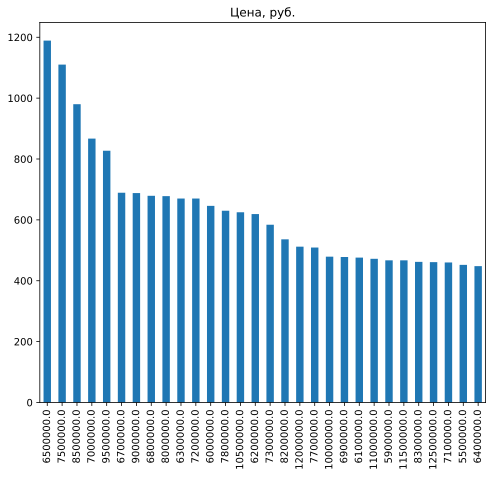

In [ ]:
dbase['Цена, руб.'].value_counts().iloc[:30].plot(kind='bar')
plt.title('Цена, руб.')
plt.show()

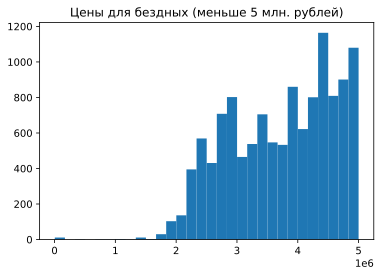

In [ ]:
plt.hist(dbase[dbase['Цена, руб.'] <5000000]['Цена, руб.'],  bins=30)
plt.title('Цены для бездных (меньше 5 млн. рублей)')
plt.show()

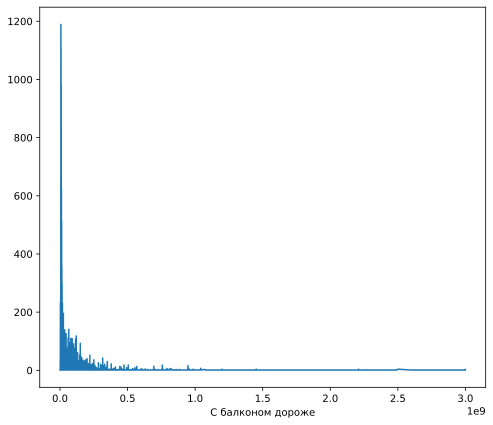

In [ ]:
dbase.groupby('Цена, руб.')['Балкон'].count().plot()
plt.xlabel('С балконом дороже')
plt.show()

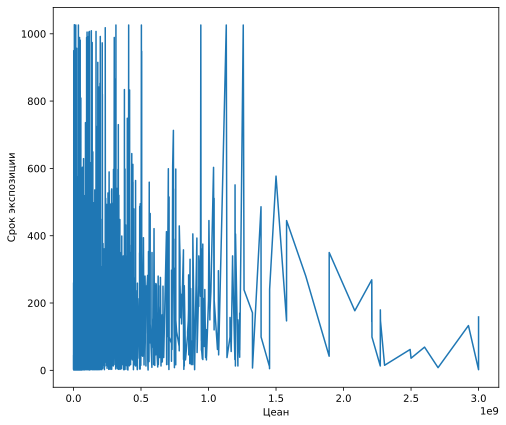

In [ ]:
# Средняя ЗП от возраста
dbase.groupby('Цена, руб.')['Кол-во дней в экспозиции'].mean().plot()
plt.xlabel('Цеан')
plt.ylabel('Срок экспозиции')
plt.show()

In [ ]:
dbase.groupby('Цена, руб.')['Балкон'].describe()['Б'].plot(kind = 'bar')
plt.title('Оценка стоимости балкона')
plt.show()